# DATA MINING PROJECT 2:  CLASSIFICATION and FP-MINING

I'm now using the Social Network Ad dataset taken from the Kaggle website:

https://www.kaggle.com/rakeshrau/social-network-ads

The dataset contains the details about salary, age and gender of users users in a social networking website. This data is useful for finding whether the user buys a product by clicking the ad appearing on his phone or not.

## CLASSIFICATION

For the task I study and compare 2 different classifiers:
- Decision Tree
- Random Forest

Now let's start with some imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.frequent_patterns import fpgrowth
from scipy.stats import chi2_contingency 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier  #RANDOM FOREST

from sklearn.tree import DecisionTreeClassifier  # DECISION TREE

I now load the data:

In [3]:
ds = pd.read_csv('./Social_Network_Ads.csv')
print(ds.shape[0])
ds.head()

400


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Generally the datasets on the Kaggle platform are always already cleaned. But I want to be sure, so I check:

In [3]:
ds.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

For the purpose, I have to assign dependent and independet variables. Since we will use the classifier to make predictions wheather the user will buy or not the artcle, the 'Purchase' attribute will be the dependent variable. Then, to keep things simpler, I will only consider the 'age' and 'estimatedSalary' as indipendent ones because they are the only interesting numerical ones (apart from the USERID).

In [4]:
x = ds.iloc[:,2:-1].values
y = ds.iloc[:,-1].values

I now split my dataset into TRAIN and TEST sets. I choose not to evaluate my model because of the scarsity of training data that otherwise would become too small. Furthermore, one good practice is to do some features scaling in order to increase model accuracy. Test size will be 20% of the total training dataset.

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

### Decision Tree

For the Decision Tree, I decide to use the Entropy measure to calculate the best split points and to train my classifier. Thanks to the libraries the code is very simplified: I just train the model, study the confusion matrix and then calculate the accuracy.

In [81]:
#training model
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train,y_train)

#getting confusion matrix
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
dta = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))


confusion matrix:
 [[53  5]
 [ 4 18]]
accuracy score =  0.8875


As we can observe, the result is good but not excellent. This could be due to high tedence for decision tree to overfitted and also very dependent on the training data: that's why we rather use Random Forest in such cases.

### Random Forest

For the Random Forest classifier I tried many n_estimators value, and in conclusion the best score was achieved with n_estimator = 11. Also, for consistency, I opted for entropy as classification criterion as I did for the Decision Tree classifier.

In [73]:
#training model
rf = RandomForestClassifier(n_estimators = 11, criterion = 'entropy')
rf.fit(x_train,y_train)

#getting confusion matrix
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
rfa = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[54  4]
 [ 0 22]]
accuracy score =  0.95


As expected, Random Forest is performing much better than the normal Decision Tree: almost 7% increase in accuracy. That's because now we are doing both random-feature selection and boosting for different decision trees.

## FREQUENT PATTERN MINING

Now I have to apply some changes to my dataset. In particular, since I'm going to use FP-growth as a frequent pattern mining algorithm, I will need all my data to be Boolean.

### Data Preprocessing

I start by scomposing the 'Age' attribute into 3 intervals:
- age < 20
- 20 <= age <30
- age >= 30


In [111]:
a = (ds['Age']<20)
b = (ds['Age']<29) ^ (ds['Age']<=20)
c = (ds['Age']>=30)

data = ds.drop(['User ID','Age'],axis=1)
data.insert(0,'Age<20',a)
data.insert(1,'20<=Age<29',b)
data.insert(2,'Age>=30',c)
data.head()

,Age<20,20<=Age<29,Age>=30,Gender,EstimatedSalary,Purchased
0,True,False,False,Male,19000,0
1,False,False,True,Male,20000,0
2,False,True,False,Female,43000,0
3,False,True,False,Female,57000,0
4,True,False,False,Male,76000,0


I'm now doing the same with the 'EstimatedSalary' attribute, with those ranges:
- salary < 40k
- 40k <= salary < 80k
- salary >= 80k


In [112]:
a = (ds['EstimatedSalary']<40000)
b = (ds['EstimatedSalary']<80000) ^ (ds['EstimatedSalary']<40000)
c = (ds['EstimatedSalary']>=80000)

data = data.drop('EstimatedSalary',axis=1)
data.insert(3,'salary<40k',a)
data.insert(4,'40k<=salary<80k',b)
data.insert(5,'salary>80k',c)
data.head()

,Age<20,20<=Age<29,Age>=30,salary<40k,40k<=salary<80k,salary>80k,Gender,Purchased
0,True,False,False,True,False,False,Male,0
1,False,False,True,True,False,False,Male,0
2,False,True,False,False,True,False,Female,0
3,False,True,False,False,True,False,Female,0
4,True,False,False,False,True,False,Male,0


In the end, the same applies to the 'Gender' attribute. This time we have a binary attribute:

In [113]:
a = data['Gender']== 'Male'

data = data.drop('Gender',axis=1)
data.insert(6,'Male',a)
data.head()


,Age<20,20<=Age<29,Age>=30,salary<40k,40k<=salary<80k,salary>80k,Male,Purchased
0,True,False,False,True,False,False,True,0
1,False,False,True,True,False,False,True,0
2,False,True,False,False,True,False,False,0
3,False,True,False,False,True,False,False,0
4,True,False,False,False,True,False,True,0


Now that I have all Boolean attributes, I can proceed with FP-Growth algo.

### FP-Growth Algorithm

For the frequent pattern mining part I chose to use the FP-growth instead of the A-priori because of its efficiency and better performace than the latter. I now mine frequent patterns thanks to the library function, and set the minimum support threshold to be 0.3 and then check if it that is too high or not.

In [114]:
fpgrowth(data, min_support=0.3, use_colnames=True)

,support,itemsets
0,0.4900,(Male)
1,0.7500,(Age>=30)
2,0.4350,(40k<=salary<80k)
3,0.3475,(salary>80k)
4,0.3575,(Purchased)
5,0.3650,"(Age>=30, Male)"
6,0.3475,"(Age>=30, 40k<=salary<80k)"
7,0.3475,"(Age>=30, Purchased)"


Now we can see that the pattern (Age>=30,Purchased) has been mined. In order to confirm this hypotesis, let's run a cosine similarity to verify :

<AxesSubplot:xlabel='Purchased', ylabel='Age>=30'>

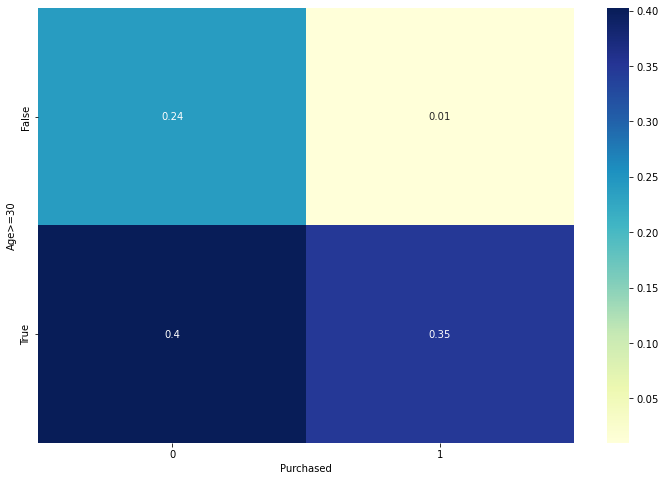

In [138]:
contigency= pd.crosstab(data['Age>=30'], data['Purchased'],normalize='all')
#contigency
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [147]:
c, p, dof, expected = chi2_contingency(contigency,correction=False)
p,dof

(0.7021055030148639, 1)

From above, 0.70 is the p-value and 1 is the degree of freedom. As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the variables ‘Age>=30’ and ‘Purchased’ are independent of each other. Thus in conclusion, no actual frequent patterns regarding Purchases have been mined.